# **Iris**
---
**<p>Stevens Institute of Technology</p>**
**<p>CS 559 WS - Machine Learning</p>**
##### Ravi Patel
##### 2/13/2020
---

## Objective
- Implement Linear Discriminant Analysis for each pair of the classes and report your results. Note that there are three class labels in the data set. Write down each step of your solution.
- Perform the kNN classification for each k value from 1 to 50 to predict the species. For each k value, compute the percentage of misclassified values on the testing set. Print out your results as a table showing the values of k and the misclassification percentages. Then plot the misclassification rates on the testing set versus the k values.

## 0. Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, KFold
import scipy
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

## 1. Data Import

### 1.1 Importing of Iris

In [2]:
df_iris = datasets.load_iris()
# df_iris = pd.read_csv('./data/iris.data', names='./data/iris.names')

In [3]:
print(df_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Convert np array data type to pandas dataframe

In [6]:
iris = pd.DataFrame(data=df_iris.data, columns=df_iris.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
target = pd.DataFrame(data=df_iris.target, columns=["species"])
target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
iris = pd.concat([iris,target], axis=1, join='inner')
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 2. EDA

In [9]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values+1

In [10]:
label_dict = {1:'Setosa', 2:'Vesicolor', 3:'Virginica'}

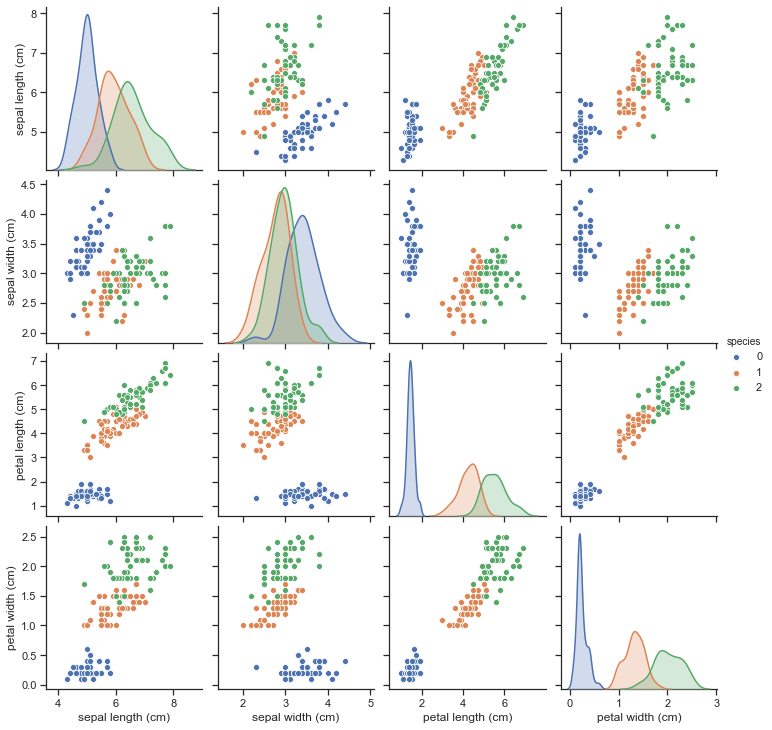

In [11]:
sns.set(style="ticks", color_codes=True)
plot = sns.pairplot(iris, hue="species")

In [12]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## 3. LDA

In [14]:
np.set_printoptions(precision=4)

mean_vector = []
for col in range(1,4):
    mean_vector.append(np.mean(X[y==col], axis = 0))
    print('Mean Vector for class %s: %s\n' %(col, mean_vector[col-1]))

Mean Vector for class 1: [5.006 3.428 1.462 0.246]

Mean Vector for class 2: [5.936 2.77  4.26  1.326]

Mean Vector for class 3: [6.588 2.974 5.552 2.026]



In [15]:
Sw = np.zeros((4,4))

In [16]:
for col, mv in zip(range(1,4), mean_vector):
    class_scatter_mat = np.zeros((4,4))
    for row in X[y == col]:
        row , mv = row.reshape(4,1), mv.reshape(4,1)
        class_scatter_mat += (row - mv).dot((row - mv).T)
    Sw += class_scatter_mat

print('Scatter Matrix within-class: \n', Sw)

Scatter Matrix within-class: 
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [17]:
overall_mean = np.mean(X, axis=0)

In [18]:
Sb = np.zeros((4,4))
for i , mean_vec in enumerate(mean_vector):
    n = X[y == i+1, : ].shape[0]
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    Sb += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('Scatter Matrix between classes: \n', Sb)

Scatter Matrix between classes: 
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [19]:
eig_values, eig_vectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

In [20]:
for i in range(len(eig_values)):
    scatt_eigvec = eig_vectors[:,i].reshape(4,1)
    print('EigenVector %s: \n %s' % (i+1, scatt_eigvec.real))
    print('EigenVector %s:  %s' % (i+1, eig_values[i].real))
    

EigenVector 1: 
 [[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]
EigenVector 1:  32.191929198278025
EigenVector 2: 
 [[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
EigenVector 2:  0.2853910426230689
EigenVector 3: 
 [[-0.879 ]
 [ 0.2496]
 [ 0.2188]
 [ 0.3422]]
EigenVector 3:  -2.09150323208503e-15
EigenVector 4: 
 [[ 0.3492]
 [-0.4242]
 [-0.4798]
 [ 0.684 ]]
EigenVector 4:  6.714007081105466e-15


In [21]:
#Checking the eigenvec-eigenvalue calculation is correct (Av = lambda v)

In [22]:
for i in range(len(eig_values)):
    eigv = eig_vectors[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(Sw).dot(Sb).dot(eigv), eig_values[i] *eigv, decimal=6, err_msg='', verbose=True)

In [23]:
eig_pairs = [ (np.abs(eig_values[i]),eig_vectors[:,i]) for i in range(len(eig_values))]

In [24]:
eig_pairs = sorted(eig_pairs, key=lambda k:k[0], reverse=True)

In [25]:
for i in eig_pairs: print(i[0])

32.191929198278025
0.2853910426230689
6.714007081105466e-15
2.09150323208503e-15


In [26]:
eigVecMatrix = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix w: \n', eigVecMatrix.real)

Matrix w: 
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


In [27]:
lda = LDA(n_components=2)
x_lda = lda.fit_transform(X,y)
x_lda

array([[ 8.0618e+00,  3.0042e-01],
       [ 7.1287e+00, -7.8666e-01],
       [ 7.4898e+00, -2.6538e-01],
       [ 6.8132e+00, -6.7063e-01],
       [ 8.1323e+00,  5.1446e-01],
       [ 7.7019e+00,  1.4617e+00],
       [ 7.2126e+00,  3.5584e-01],
       [ 7.6053e+00, -1.1634e-02],
       [ 6.5606e+00, -1.0152e+00],
       [ 7.3431e+00, -9.4732e-01],
       [ 8.3974e+00,  6.4736e-01],
       [ 7.2193e+00, -1.0965e-01],
       [ 7.3268e+00, -1.0730e+00],
       [ 7.5725e+00, -8.0546e-01],
       [ 9.8498e+00,  1.5859e+00],
       [ 9.1582e+00,  2.7376e+00],
       [ 8.5824e+00,  1.8345e+00],
       [ 7.7808e+00,  5.8434e-01],
       [ 8.0784e+00,  9.6858e-01],
       [ 8.0210e+00,  1.1405e+00],
       [ 7.4968e+00, -1.8838e-01],
       [ 7.5865e+00,  1.2080e+00],
       [ 8.6810e+00,  8.7759e-01],
       [ 6.2514e+00,  4.3970e-01],
       [ 6.5589e+00, -3.8922e-01],
       [ 6.7714e+00, -9.7063e-01],
       [ 6.8231e+00,  4.6301e-01],
       [ 7.9246e+00,  2.0964e-01],
       [ 7.9913e+00,

## 4. KNN

In [28]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
#k from 1 to 50
K = 50
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN

error = []
for i in range(1,50):
    classify = KNN(n_neighbors=i)
    classify.fit(X_train, y_train)
    
    y_predict = classify.predict(X_test)
    error.append(np.mean(y_predict != y_test))

Text(0, 0.5, 'Mean Error')

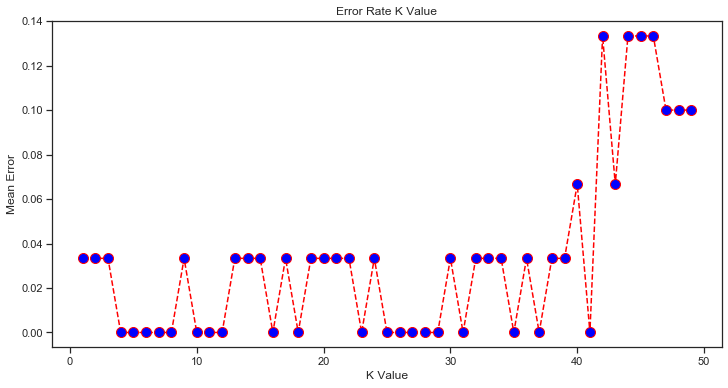

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')